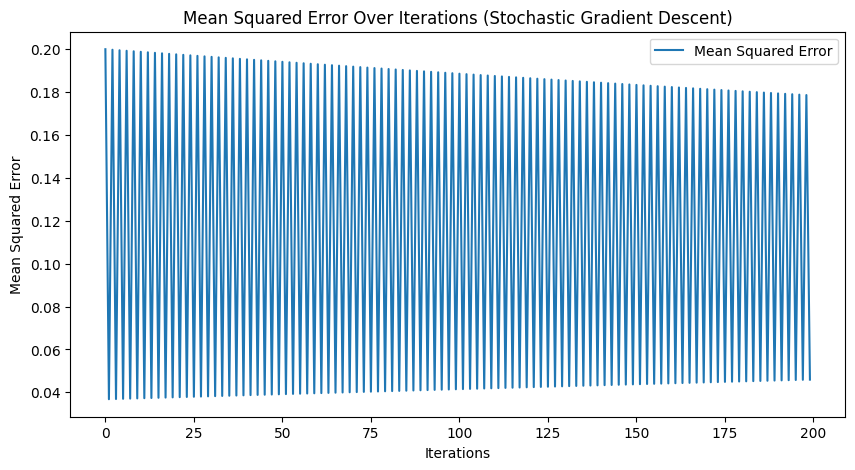

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([[0.5], [2.5]])
Y = np.array([[0.2], [0.9]])

# Neural Network parameters
input_size = 1
hidden_size = 3
output_size = 1
learning_rate = 0.01
epochs = 100

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
biases_output = np.zeros((1, output_size))

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Stochastic Gradient Descent
mse_list = []

for epoch in range(epochs):
    for i in range(len(X)):
        # Forward propagation
        input_layer = X[i:i+1]
        target_output = Y[i:i+1]

        hidden_layer_input = np.dot(input_layer, weights_input_hidden) + biases_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_output = sigmoid(output_layer_input)

        # Backpropagation
        error = target_output - predicted_output
        mse = mean_squared_error(target_output, predicted_output)
        mse_list.append(mse)

        # Update weights and biases
        output_error = error * sigmoid_derivative(predicted_output)
        hidden_layer_error = output_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

        weights_hidden_output += hidden_layer_output.T.dot(output_error) * learning_rate
        biases_output += np.sum(output_error, axis=0, keepdims=True) * learning_rate

        weights_input_hidden += input_layer.T.dot(hidden_layer_error) * learning_rate
        biases_hidden += np.sum(hidden_layer_error, axis=0, keepdims=True) * learning_rate

# Plot Mean Squared Error during training
plt.figure(figsize=(10, 5))
plt.plot(mse_list, label='Mean Squared Error')
plt.title('Mean Squared Error Over Iterations (Stochastic Gradient Descent)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
